In [96]:
# basic imports
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import os
import netCDF4 as nc
import xarray as xr
from shapely.geometry.polygon import Polygon
from scipy.interpolate import griddata

In [97]:
import warnings
warnings.filterwarnings('ignore')


In [98]:
# data folder
datafolder = os.getcwd()
datafolder = os.path.join(datafolder, "jason")

In [99]:
# list dir data folder
file_path = []
for file in os.listdir(datafolder):
    file_path.append(os.path.join(datafolder, file))

In [100]:
ds = nc.Dataset(file_path[1],'r',format="NETCDF4")

In [101]:
ds = xr.open_dataset(file_path[2])

In [102]:
ds.time.values[0]

numpy.datetime64('2013-05-03T05:13:07.737273920')

In [103]:
cycles = np.arange(178, 292)

In [104]:
file_path = file_path[1:]

In [105]:
year = int(file_path[-1][100:104])
month = int(file_path[-1][104:106])

In [106]:
months = np.arange(1,13)
years = np.arange(2013, 2017)
years

array([2013, 2014, 2015, 2016])

In [107]:
# Classify data year and month wise
def classify_yearwise(file_path, target_year):
    target_year_files = []
    for file in file_path:
        year = int(file[100:104])
        
        if year == target_year:
            target_year_files.append(file)
    return target_year_files
    
def classify_monthwise(file_path, target_month):
    target_month_files = []
    for file in file_path:
        month = int(file[104:106])
        
        if month == target_month:
            target_month_files.append(file)
    return target_month_files

def classify_periodically(file_path, target_month, target_year):
            
    return classify_monthwise(classify_yearwise(file_path, target_year), target_month) 

def classify_cycles(file_path, target_cycle):
    target_files = []
    for file in file_path:
        track = int(file[74:77])
        if track == target_cycle:
            target_files.append(file)
    return target_files

def classify_track(file_path, target_track):
    target_files = []
    for file in file_path:
        track = int(file[96:99])
        if track == target_track:
            target_files.append(file)
    return target_files

In [108]:
file[96:99]

''

In [109]:
classify_track(classify_periodically(file_path, 7, 2014), 3)

[]

In [110]:
passes = ['003', '016', '029', '042', '066', '079', '092', '105', '118', '131', '155', '168', '181', '194', '207', '220', '231', '244']
ascending_pass = [3, 16, 29, 42, 66, 92, 118, 168, 194, 220, 244]
descending_pass = [79, 105, 131, 155, 181, 207, 231]

In [111]:
classify_cycles(file_path, 190)

['D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP190_003_20130829_043351_20130829_053004.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP190_016_20130829_164439_20130829_174051.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP190_029_20130830_045526_20130830_055139.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP190_042_20130830_170614_20130830_180226.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP190_066_20130831_153523_20130831_163135.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP190_079_20130901_034610_20130901_044223.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP190_092_20130901_155658_20130901_165310.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP

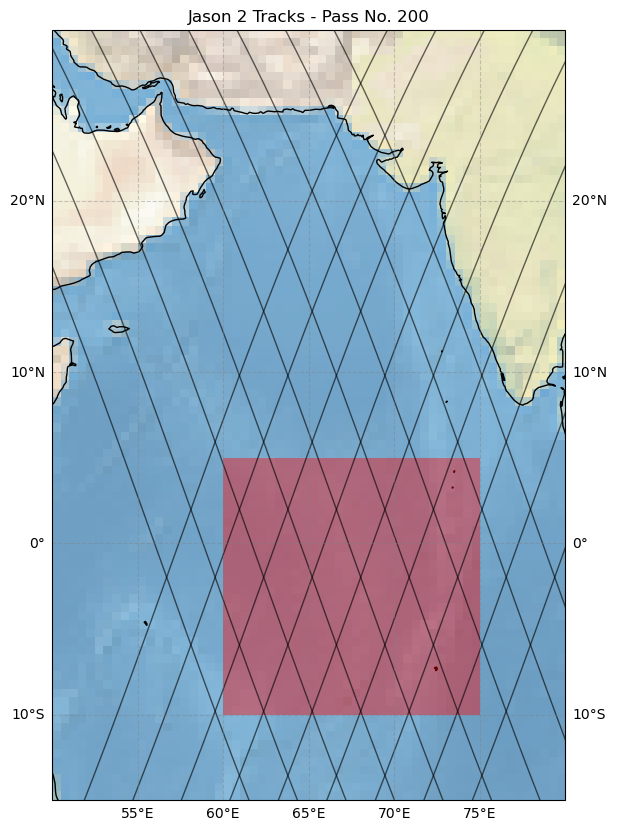

In [112]:
# Visualizing the tracks for a cycle
cycle = 200
fig = plt.figure(figsize=(10, 10))
# setting projection for geoaxis cartopy object
proj = ccrs.PlateCarree()
ax = plt.axes(projection = proj)
ax.set_extent([50, 80, -15, 30], crs=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
for file in classify_cycles(file_path, cycle):
    ds = xr.open_dataset(file)
    lat = ds.lat.values
    lon = ds.lon.values
    mdt = ds.mean_topography.values
    depth = ds.bathymetry.values
    mss = ds.mean_sea_surface.values

    ax.plot(lon, lat, color='black', linewidth=1.0, transform=ccrs.PlateCarree(), alpha=0.6)

plt.title(f"Jason 2 Tracks - Pass No. {cycle}")

#plt.colorbar()
#plt.clim(-2000, 0)  #
roi = Polygon(((60, -10),
        (60, 5),
        (75, 5),
        (75, -10),
        (60, -10)))

ax.add_geometries([roi], crs=cartopy.crs.PlateCarree(), alpha=0.4, facecolor='r', label="ROI")
ax.set_aspect("equal")
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.4, linestyle='--')
# remove top x label
gl.top_labels = False    

# plt.savefig('study_area_regular_tracks_jason.png')
plt.show()

In [113]:
classify_cycles(file_path, cycles[50])

['D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP228_003_20140909_233754_20140910_003407.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP228_016_20140910_114842_20140910_124455.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP228_029_20140910_235929_20140911_005542.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP228_042_20140911_121017_20140911_130630.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP228_066_20140912_103926_20140912_113539.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP228_079_20140912_225013_20140912_234626.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP228_092_20140913_110101_20140913_115714.nc.nc',
 'D:\\MSR\\SEM-II\\Environmental-Geodesy\\Labs\\altimetry_data\\jason\\JA2_GPN_2PdP

In [114]:
# setting gridlines
lats = []
lons = []
mss = [] 

for file in classify_cycles(file_path, cycles[1]):
    ds = xr.open_dataset(file)
    lat = ds.lat.values
    lon = ds.lon.values
    buffer = 2.0
    idx = (lat <= 5+buffer) & (lat >= -10-buffer) & (lon <= 75+buffer) & (lon >= 60-buffer)
    lats.extend(lat[idx])
    lons.extend(lon[idx])
    mss.extend(ds.mean_sea_surface.values[idx])
    

In [115]:
fig = plt.figure(figsize=(10, 10))
# setting projection for geoaxis cartopy object
proj = ccrs.PlateCarree()
ax = plt.axes(projection = proj)
ax.set_extent([45, 80, -15, 30], crs=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()

im = ax.scatter(lons, lats, c=mss, s = 0.9, cmap="Spectral_r", vmin=-90, vmax=-45)
plt.colorbar(im)

#ax.plot(lon, lat, color='black', linewidth=1.0, transform=ccrs.PlateCarree(), alpha=0.6)

plt.title(f"Jason 2 Tracks - Pass No. {cycle} - MSS")
#plt.colorbar()
#plt.clim(-2000, 0)  #
roi = Polygon(((60, -10),
        (60, 5),
        (75, 5),
        (75, -10),
        (60, -10)))

ax.add_geometries([roi], crs=cartopy.crs.PlateCarree(), alpha=1, facecolor='None', edgecolor='black')

gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.4, linestyle='--')
# remove top x label
gl.top_labels = False    

ax.set_aspect('auto', adjustable=None)

#plt.savefig('study_area_tracks.png')
plt.show()

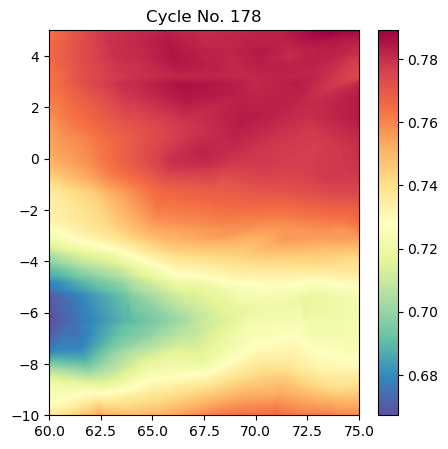

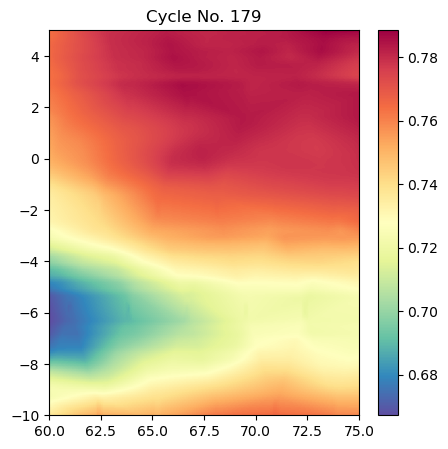

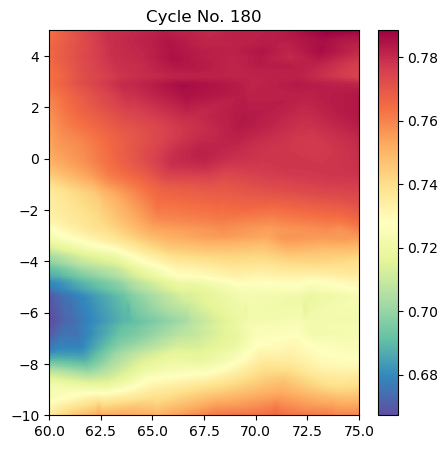

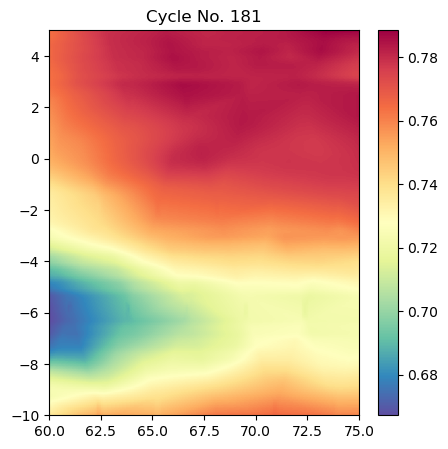

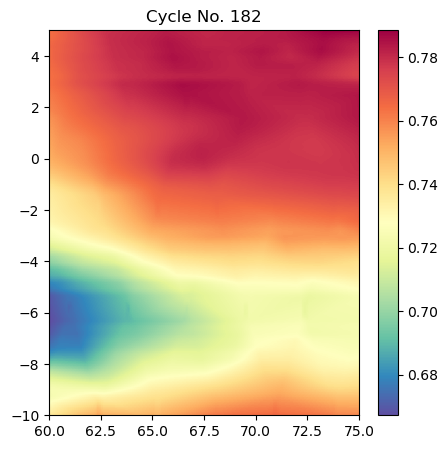

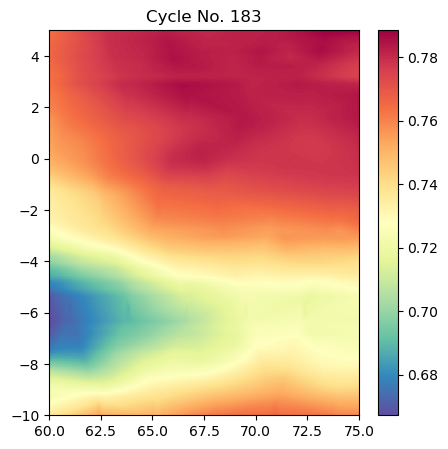

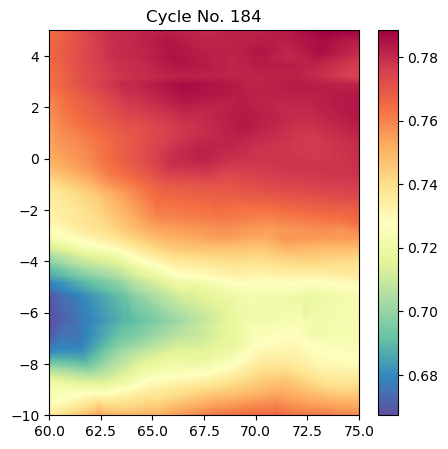

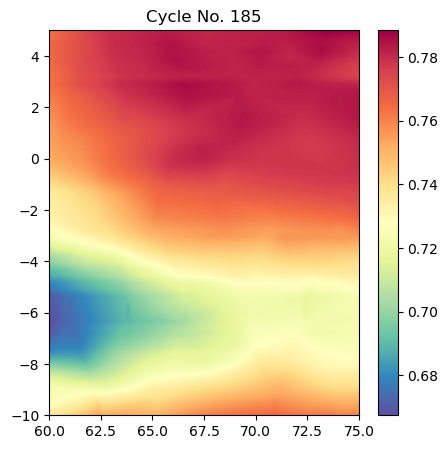

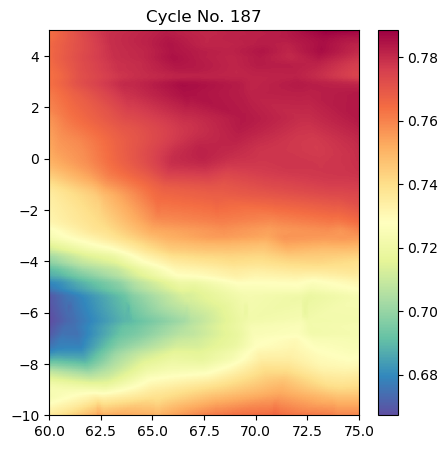

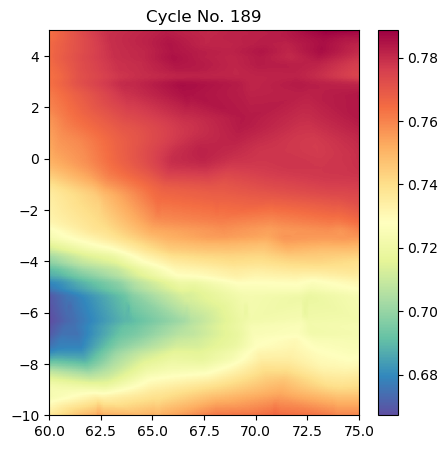

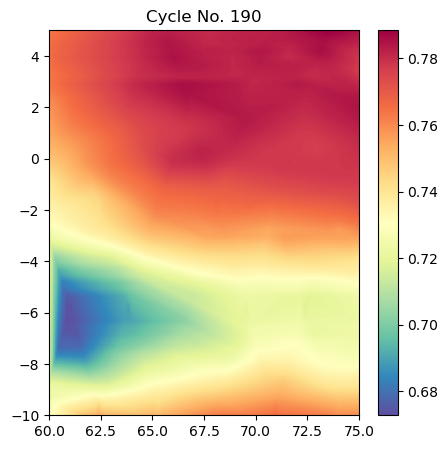

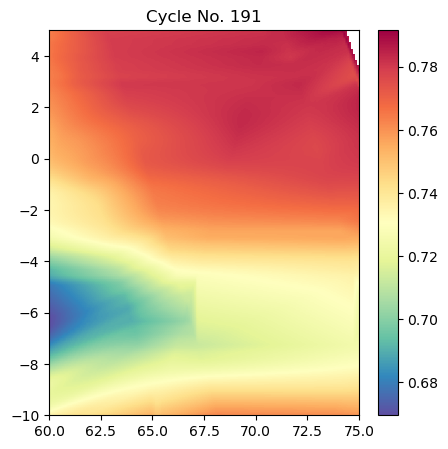

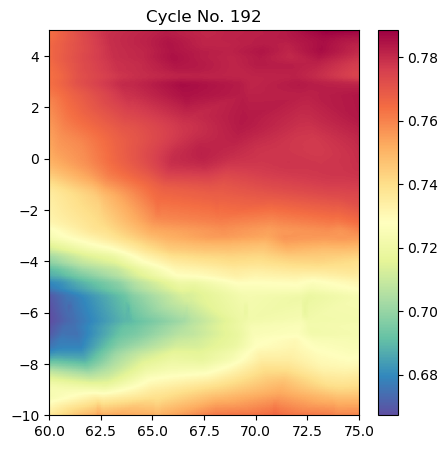

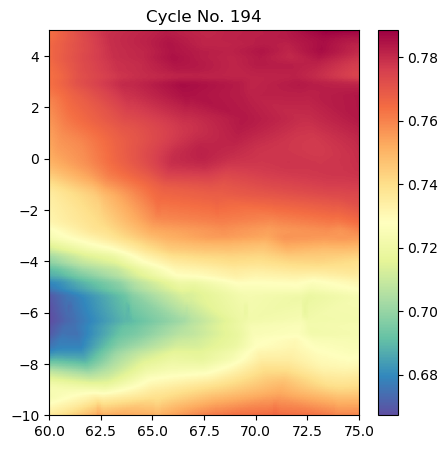

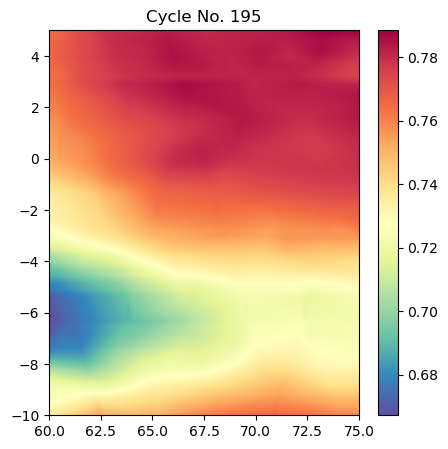

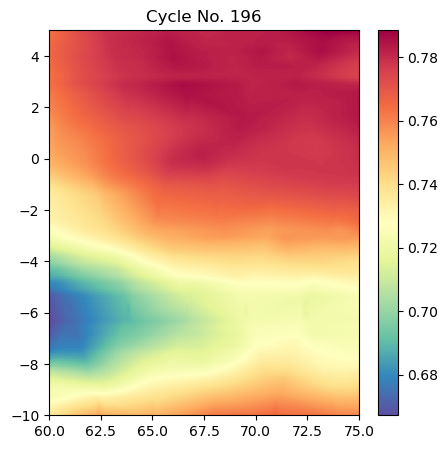

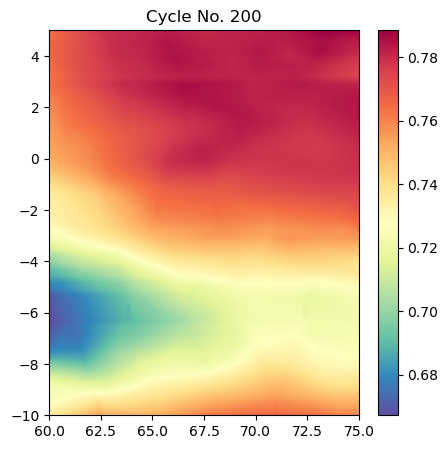

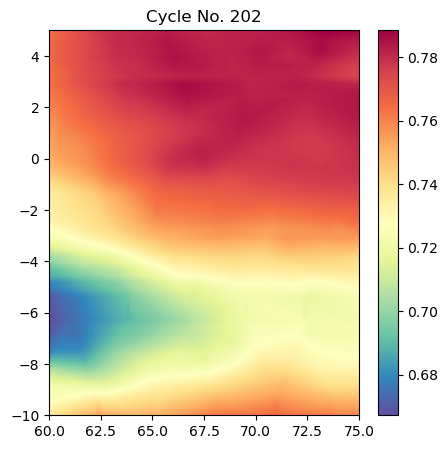

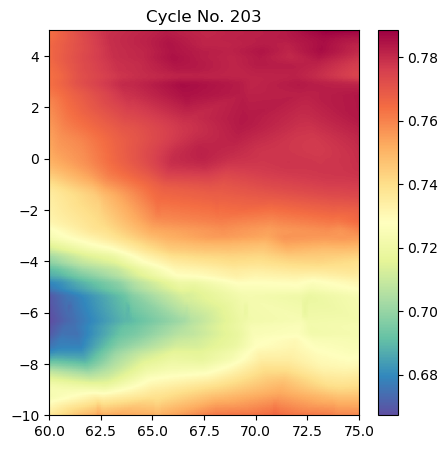

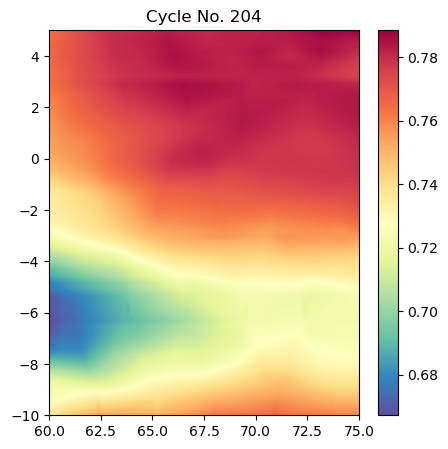

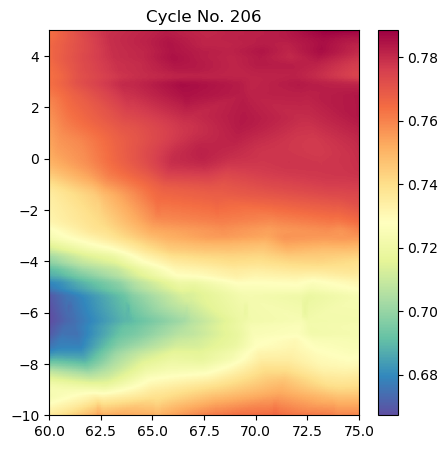

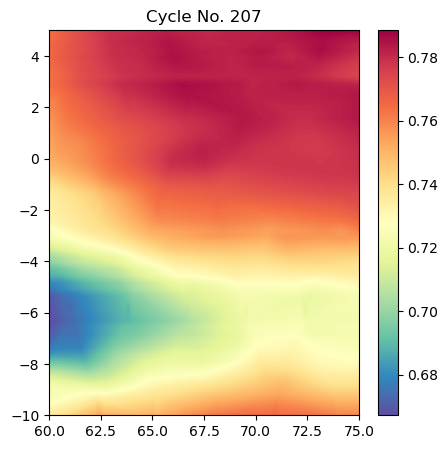

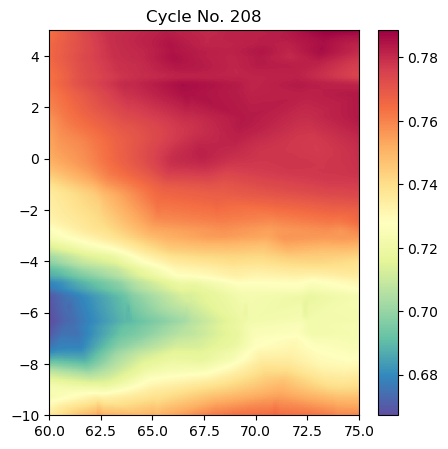

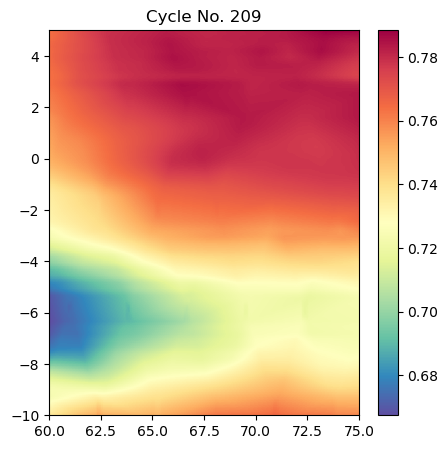

KeyboardInterrupt: 

In [118]:

for cycle in cycles:
    mss = []
    lons = []
    lats = [] 
    for file in classify_cycles(file_path, cycle):
        ds = xr.open_dataset(file)
        lat = ds.lat.values
        lon = ds.lon.values
        buffer = 2.0
        idx = (lat <= 5+buffer) & (lat >= -10-buffer) & (lon <= 75+buffer) & (lon >= 60-buffer)
        lats.extend(lat[idx])
        lons.extend(lon[idx])
        mss.extend(ds.mean_topography.values[idx])

    grid = griddata((lons, lats), mss, (xx, yy), method="linear")

    fig = plt.figure(figsize = (5, 5))
    plt.imshow(grid, origin='lower', aspect='auto',cmap="Spectral_r", extent =[60, 75, -10, 5])
    plt.title(f"Cycle No. {cycle}")
    plt.colorbar()
    plt.show()

In [ ]:
reg_lat = np.arange(-10, 5, 0.1)
reg_lon = np.arange(60, 75, 0.1)
xx, yy = np.meshgrid(reg_lon, reg_lat)

In [ ]:
extent

In [ ]:
np.shape(xx)

In [119]:
ds

<xarray.Dataset>
Dimensions:                             (time: 3243, meas_ind: 20)
Coordinates:
  * time                                (time) datetime64[ns] 2014-03-17T23:0...
  * meas_ind                            (meas_ind) int8 0 1 2 3 ... 16 17 18 19
    lat                                 (time) float64 66.14 66.14 ... -66.15
    lon                                 (time) float64 355.8 355.9 ... 161.5
    lon_20hz                            (time, meas_ind) float64 ...
    lat_20hz                            (time, meas_ind) float64 ...
Data variables: (12/171)
    time_20hz                           (time, meas_ind) datetime64[ns] ...
    surface_type                        (time) float32 ...
    alt_echo_type                       (time) float32 ...
    rad_surf_type                       (time) float32 ...
    rad_distance_to_land                (time) float64 ...
    qual_alt_1hz_range_ku               (time) float32 ...
    ...                                  ...
    mqe_20hz_ku_mle3                    (time, meas_ind) float32 ...
    mqe_20hz_c                          (time, meas_ind) float32 ...
    peakiness_20hz_ku                   (time, meas_ind) float32 ...
    peakiness_20hz_c                    (time, meas_ind) float32 ...
    ssha                                (time) float32 ...
    ssha_mle3                           (time) float32 ...
Attributes: (12/38)
    Conventions:                      CF-1.1
    title:                            GDR - Standard dataset
    institution:                      CNES
    source:                           radar altimeter
    history:                          2014-05-20 12:52:00 : Creation
    contact:                          CNES aviso@oceanobs.com, EUMETSAT ops@e...
    ...                               ...
    xref_utc_tai_data:                SMM_TUC_AXVCNE20120605_075702_19900101_...
    xref_radiometer_calibration:      AJ2_AL1_AXVJPL20080620_074625_20080620_...
    xref_gim_data:                    JA2_ION_AXPCNE20140318_064432_20140317_...
    xref_mog2d_data:                  SMM_MOG_AXVCNE20140407_071501_20140317_...
    ellipsoid_axis:                   6378136.3
    ellipsoid_flattening:             0.0033528131778969